In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
rng = np.random.default_rng(1729)

# Match Queue (Poisson)

## The Matching Method

In this approach, we will seek to match every incoming party with their complement. For example, 2's are matched with 3's, 4's are matched with 1's, and 5's go right ahead. Here's an example of how we would group 10 parties who join the Queue:

In [30]:
# Function for grouping parties of X with parties of 5-X
# Returns a list of all average wait times and
# a dataframe of all party size amounts that were left unmatched

def CreatePartyMatch(arrivals,sizes):
    c_arr = np.cumsum(arrivals)
    df = pd.DataFrame({'Arrival Time': c_arr, 'Party Size': sizes, 'Time Passed':arrivals})

    waits = []
    weights = []
    matches = []
    parties = []
    for i in range(4):
        matches.append([])
    
    for i in range(len(arrivals)):
        val = df.iloc[i]
        party = int(val[1])
        time = val[0]

        # if the party size is 5, add zero to average wait times
        if party == 5:
            waits.append(0)
            weights.append(0)
            parties.append(5)
            continue
        
        # Party of X's party of (5-X):
        complement = matches[4 - party]

        # Party of X doesn't have a match, keep it waiting with other partys of X
        if complement == []:
            matches[party-1].append(val)
        # Party of X found a party of (5-X), remove the first one waiting
        else:
            temp = complement.pop()
            waits.append((time - temp[0])/2)
            weights.append((time - temp[0])*temp[1]/5)
            parties.append([temp[1],val[1]])
    leftovers = []
    for m in matches:
        leftovers.append(len(m))
    dfl = pd.DataFrame({'Party Size':[1,2,3,4],'leftover amount':leftovers})

    return waits,weights,dfl,parties


### Poisson Function

In [31]:
def PoissonClean(N,lamb):
    arr = rng.poisson(lamb, size=N)
    for i in range(N):
        if arr[i] == 0:
            arr[i] = 1
        if arr[i] > 5:
            arr[i] = rng.choice([1,2,3,4,5])
    return arr

L = 1

### Match test when N = 1000, Poisson by Party

[[np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(2.0), np.float64(3.0)], 5, [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], 5, [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), 

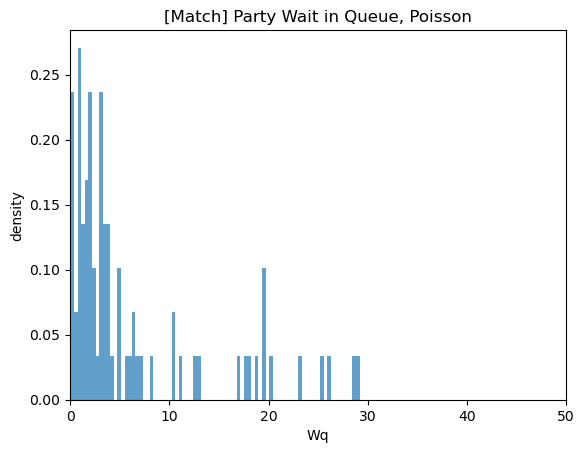

In [32]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = PoissonClean(N,L)

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=80, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Match] Party Wait in Queue, Poisson")
plt.xlim(0, 50)

print(parties)
s = pd.Series(avg_waits)
s.describe()

party_sample_pois = s

### Repeated N=1000 Poisson Match Trials by Party

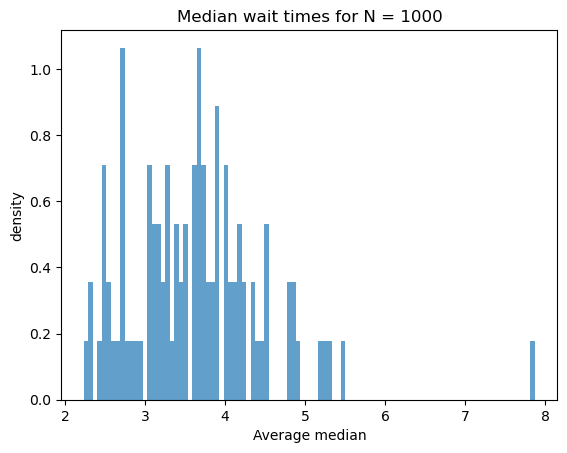

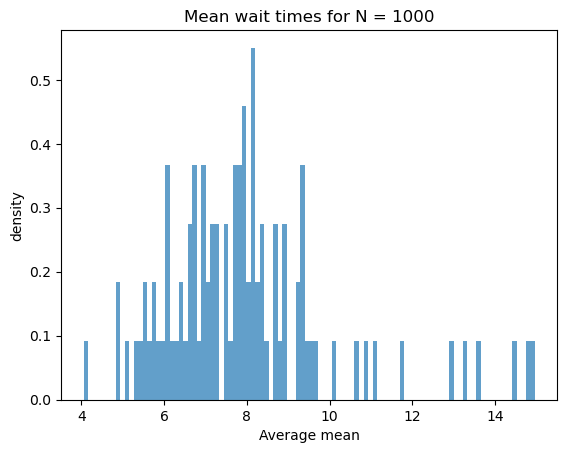

In [33]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = PoissonClean(N,L)

    avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

    s = pd.Series(avg_waits)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

party_means_pois = pd.Series(means)
party_meds_pois = pd.Series(medians)

### Match Test when N = 1000 Poisson by Individual

[[np.float64(2.0), np.float64(3.0)], [np.float64(3.0), np.float64(2.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], 5, [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(1.0), np.float64(4.0)], [np.float64(2.0), np.float64(3.0)], [np.float64(2.0), np.flo

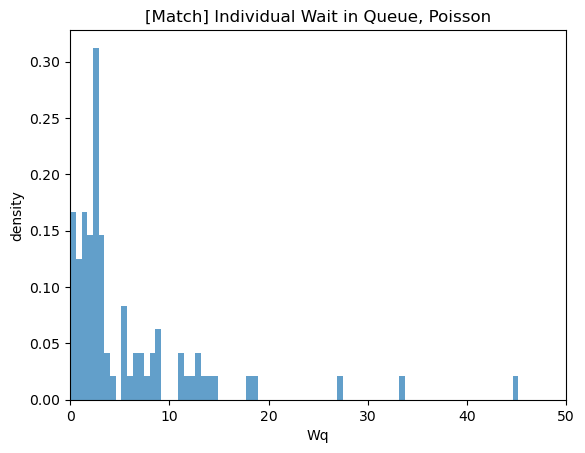

In [34]:
N = 1000

arrivals = rng.uniform(0,5, size=N)
sizes = PoissonClean(N,L)

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

plt.figure()
plt.hist(avg_waits, bins=100, density=True, alpha=0.7)
plt.xlabel("Wq"); plt.ylabel("density"); plt.title("[Match] Individual Wait in Queue, Poisson")
plt.xlim(0, 50)

print(parties)
s = pd.Series(weight)
s.describe()

ind_sample_pois = s

### Repeated N=1000 Poisson Match Trials by Individual

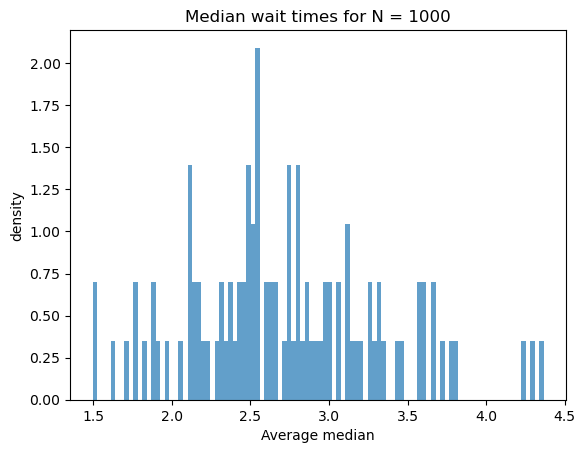

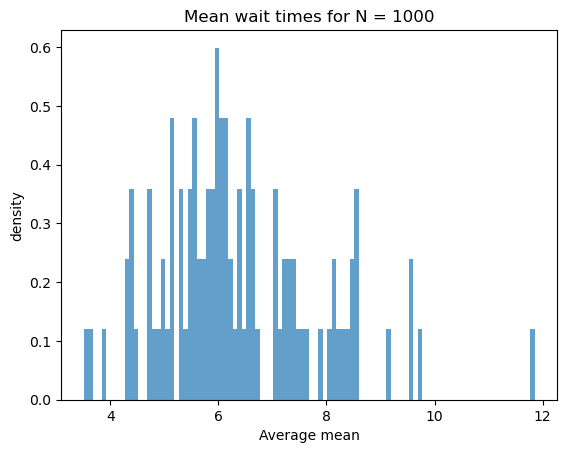

In [35]:
N = 1000
means = []
medians = []

for i in range(100):
    arrivals = rng.uniform(0,5, size=N)
    sizes = PoissonClean(N,L)

    avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)

    s = pd.Series(weight)
    means.append(s.describe()[1])
    medians.append(s.describe()[5])


plt.figure()
plt.hist(medians, bins=100, density=True, alpha=0.7)
plt.xlabel("Average median"); plt.ylabel("density"); plt.title("Median wait times for N = 1000")

plt.figure()
plt.hist(means, bins=100, density=True, alpha=0.7)
plt.xlabel("Average mean"); plt.ylabel("density"); plt.title("Mean wait times for N = 1000")

ind_means_pois = pd.Series(means)
ind_meds_pois = pd.Series(medians)

## Conclusion

In [36]:
print(party_sample_pois.describe())
print()
print("Average party mean across 100 trials:",party_means_pois.mean())
print("Average party median across 100 trials:",party_meds_pois.mean())
print()
print(ind_sample_pois.describe())
print()
print("Average individual mean across 100 trials:",ind_means_pois.mean())
print("Average individual median across 100 trials:",ind_meds_pois.mean())

count    81.000000
mean      6.215553
std       7.549601
min       0.000000
25%       1.357684
50%       3.045203
75%       6.801828
max      29.176442
dtype: float64

Average party mean across 100 trials: 7.966974791589712
Average party median across 100 trials: 3.6264577617453218

count    84.000000
mean      4.867682
std       7.447888
min       0.000000
25%       0.769466
50%       2.146565
75%       5.903716
max      45.753743
dtype: float64

Average individual mean across 100 trials: 6.348460121340402
Average individual median across 100 trials: 2.7209202598431217


In [38]:
# Testing

arrivals = rng.uniform(0,5, size=1000)
sizes = PoissonClean(1000,1)

avg_waits,weight,dfl,parties = CreatePartyMatch(arrivals,sizes)


for i in range(4):
    print((i+1),":",dfl['leftover amount'][i])

1 : 716
2 : 117
3 : 0
4 : 0
